# ASSIGNMENT 2 - E-COMMERCE EDA PYTHON

=============================================================================================================

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Loading Data

In [61]:
df = pd.read_csv("Ecommerce.csv",encoding= 'unicode_escape')

#some data that can not be encoded-decoded(some non ascii charater)

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Data Exploration

In [8]:
df.info()

#entries =541909

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df.describe(include = "all")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [10]:
df.isnull().sum()

#There are 1454 null values in Description and 135080 in Customer id

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Data Preprocessing

    QUESTION 2:
    
    Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode) 


In [11]:
df["CustomerID"].fillna(0, inplace = True)

#Replacing all null values of the column CutomerID with 0 as Mean/Median/Mode is not appropiate metric in this case.

In [12]:
df["Description"].fillna(df["Description"].mode()[0], inplace = True)

#Replacing all null values of the column Description using Mode metric.

In [13]:
df.isnull().sum()

#Checking for null values. It is lear that all null values has been removed.

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

    QUESTION 3:

    Remove duplicate rows

In [14]:
df.drop_duplicates()

#Droping all the duplicate rows
#5268 rows has been deleted

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


    QUESTION 4:
    
    Remove rows which have negative values in Quantity column 


In [15]:
df = df[df["Quantity"]>=0]
df = df[df["UnitPrice"]>=0]
df.info()

#Removing rows with negative values of Quantity 
#Total 5356 rows has been eleminated

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531283 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531283 non-null  object 
 1   StockCode    531283 non-null  object 
 2   Description  531283 non-null  object 
 3   Quantity     531283 non-null  int64  
 4   InvoiceDate  531283 non-null  object 
 5   UnitPrice    531283 non-null  float64
 6   CustomerID   531283 non-null  float64
 7   Country      531283 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


# Data Exploration

    QUESTION 1:
     
     a. Boxplot – All Numeric Variables 
     b. Histogram – All Numeric Variables 
     c. Distribution Plot – All Numeric Variables 
     d. Aggregation for all numerical Columns 
     e. Unique Values across all columns 
     f. Duplicate values across all columns 
     g. Correlation – Heatmap - All Numeric Variables 
     h. Regression Plot - All Numeric Variables 
     i. Bar Plot – Every Categorical Variable vs every Numerical Variable 
     j. Pair plot - All Numeric Variables 
     k. Line chart to show the trend of data - All Numeric/Date Variables 
     l. Plot the skewness - All Numeric Variables 

In [16]:
df["CustomerID"]=df["CustomerID"].astype(int)
df["CustomerID"].dtype

#Type conversion of CustomerId from float to int

dtype('int32')

In [17]:
#  NUMERIC COLUMN: 1) QUANTITY    2) UNIT_PRICE 

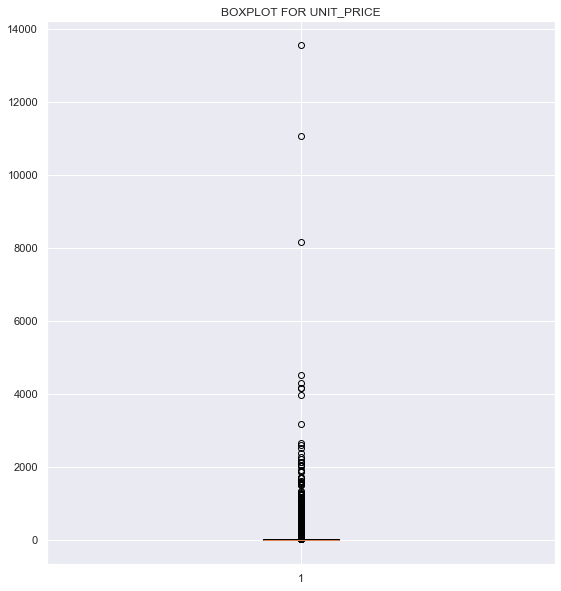

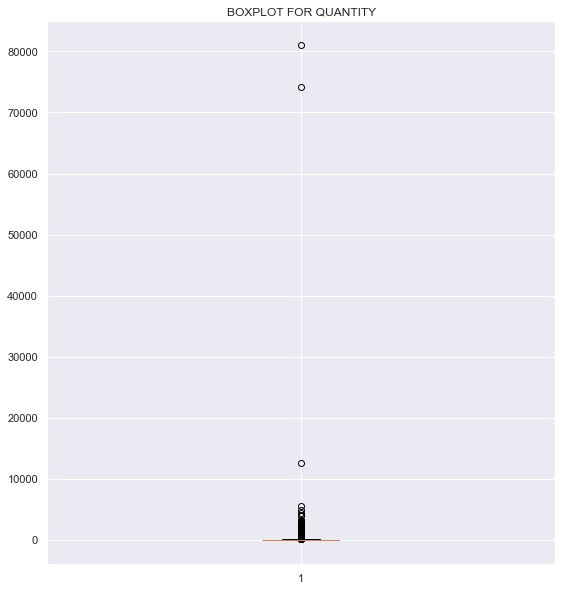

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.boxplot(df["UnitPrice"])
plt.title("BOXPLOT FOR UNIT_PRICE")
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
plt.title("BOXPLOT FOR QUANTITY")
plt.boxplot(df["Quantity"])
plt.show()

#ANSWER A:

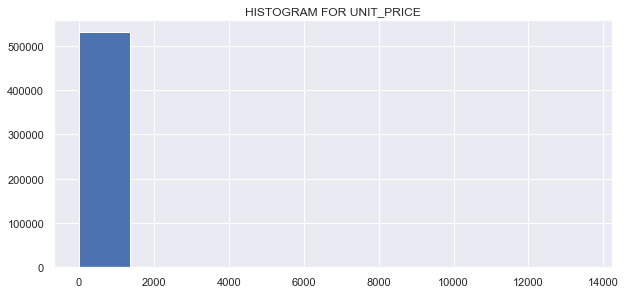

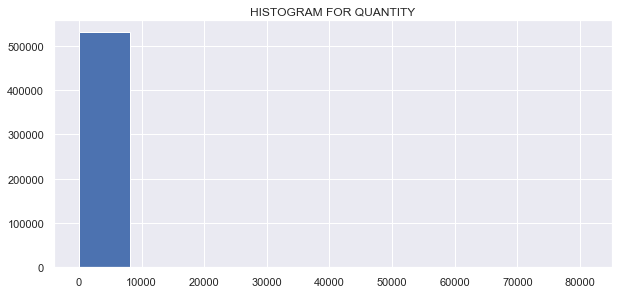

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.hist(df["UnitPrice"])
plt.title("HISTOGRAM FOR UNIT_PRICE")
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.hist(df["Quantity"])
plt.title("HISTOGRAM FOR QUANTITY")
plt.show()

#ANSWER: B

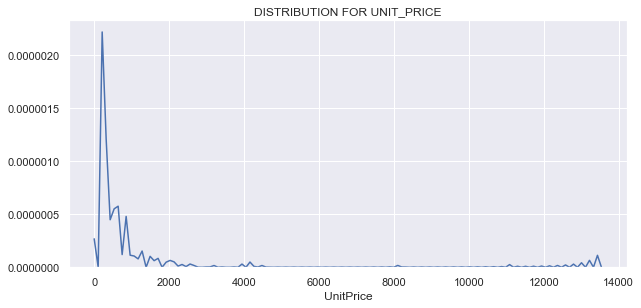

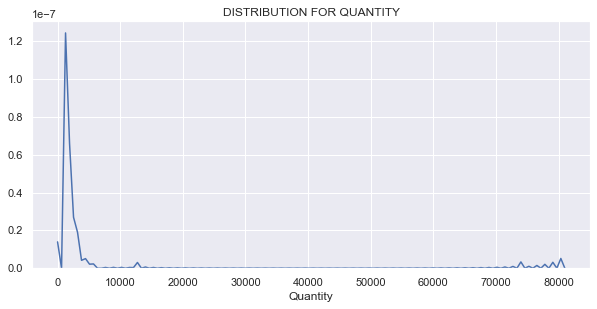

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.distplot(df["UnitPrice"], hist=False)
plt.title("DISTRIBUTION FOR UNIT_PRICE")
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
sns.distplot(df["Quantity"], hist=False)
plt.title("DISTRIBUTION FOR QUANTITY")
plt.show()

#ANSWER: C

In [164]:
df["UnitPrice"].describe()     #or df.agg(["sum","min"])

#ANSWER D:

count    531283.000000
mean          3.898954
std          35.876279
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

In [165]:
df["Quantity"].describe()

#ANSWER D:

count    531283.000000
mean         10.655299
std         156.830617
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [166]:
#ANSWER E:

In [51]:
df["UnitPrice"].unique()



array([   2.55,    3.39,    2.75, ...,    4.76,  933.17, 1714.17])

In [52]:
df["Quantity"].unique()

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    56,    72,
         200,   600,   480,    14,    11,    33,    13,    70,   252,
          60,   216,   384,    27,    15,    22,    19,    17,    21,
          34,    47,   108,    52,    75,   270,    42,   240,    90,
         320,  1824,   204,    69,   160,  2880,  1400,    39,    26,
        1440,    31,    82,    78,    97,    98,    35,    57,   110,
         720,   156,   324,    38,    37,    49,    95,    29,    41,
         402,   378,   150,   300,    54,   104,    67,   258,    66,
          44,    55,    46,    99,    61,   408,   972,   208,  1008,
        1000,  1488,   250,  1394,   400,    79,    84,   272,   113,
          45,   106,    68,   267,   115,    65,  1728,    53,    76,
         460,    71,

In [44]:
df["InvoiceNo"].unique() 

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

In [46]:
df["StockCode"].unique()

array(['85123A', '71053', '84406B', ..., '90214U', '47591b', '23843'],
      dtype=object)

In [47]:
df["Description"].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'LETTER "U" BLING KEY RING',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [48]:
df["InvoiceDate"].unique()

array(['2010-12-01T08:26:00.000000000', '2010-12-01T08:28:00.000000000',
       '2010-12-01T08:34:00.000000000', ...,
       '2011-12-09T12:31:00.000000000', '2011-12-09T12:49:00.000000000',
       '2011-12-09T12:50:00.000000000'], dtype='datetime64[ns]')

In [49]:
df["CustomerID"].unique()

array([17850, 13047, 12583, ..., 13298, 14569, 12713])

In [50]:
df["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
#ANSWER F:

In [62]:
q=df["Quantity"].duplicated()
print("True represents duplicate entry")
print("Entries: ")
print(q.value_counts())


q[0:5]

#q is a list whith booleans entries we can access any index and find it is duplicate entry or not. True = Duplicated

True represents duplicate entry
Entries: 
True     541187
False       722
Name: Quantity, dtype: int64


0    False
1     True
2    False
3     True
4     True
Name: Quantity, dtype: bool

In [63]:
q=df["Country"].duplicated()
q=df.duplicated()
print("True represents duplicate entry")
print("Entries: ")
print(q.value_counts())

True represents duplicate entry
Entries: 
False    536641
True       5268
dtype: int64


In [65]:
q=df["UnitPrice"].duplicated()
q=df.duplicated()
print("True represents duplicate entry")
print("Entries: ")
print(q.value_counts())


True represents duplicate entry
Entries: 
False    536641
True       5268
dtype: int64


In [68]:
q=df["InvoiceNo"].duplicated()
print("True represents duplicate entry")
print("Entries: ")
print(q.value_counts())

True represents duplicate entry
Entries: 
True     516009
False     25900
Name: InvoiceNo, dtype: int64


In [69]:
q=df["StockCode"].duplicated()
print("True represents duplicate entry")
print("Entries: ")
print(q.value_counts())

True represents duplicate entry
Entries: 
True     537839
False      4070
Name: StockCode, dtype: int64


In [71]:
q=df["Description"].duplicated()
q=df.duplicated()
print("True represents duplicate entry")
print("Entries: ")
print(q.value_counts())

True represents duplicate entry
Entries: 
False    536641
True       5268
dtype: int64


In [72]:
q=df["CustomerID"].duplicated()
print("True represents duplicate entry")
print("Entries: ")
print(q.value_counts())

True represents duplicate entry
Entries: 
True     537536
False      4373
Name: CustomerID, dtype: int64


# Data Analysis

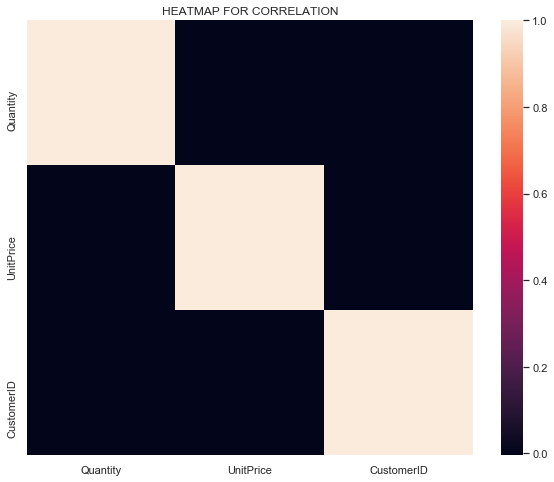

In [79]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.title("HEATMAP FOR CORRELATION")
plt.show()

# ANSWER G

Text(0.5, 1.0, 'PRICE VS QUANTITY RELATION')

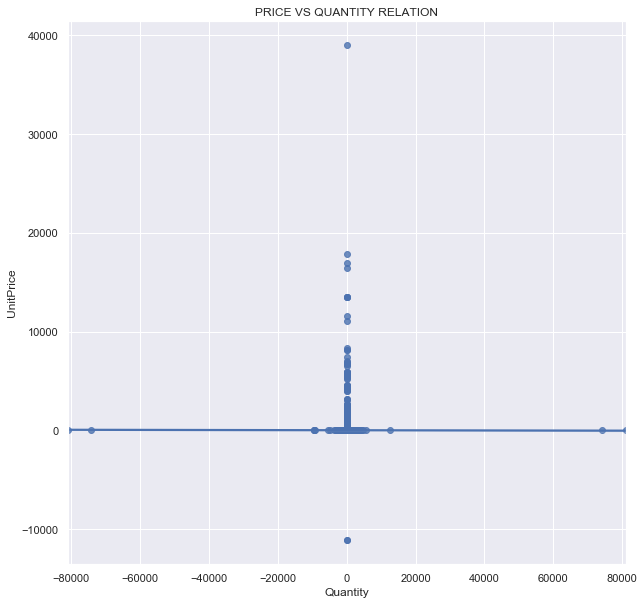

In [80]:
plt.figure(figsize=(10,10))
sns.regplot(data = df, x= "Quantity", y ="UnitPrice")
plt.title("PRICE VS QUANTITY RELATION")

#ANSWER H:

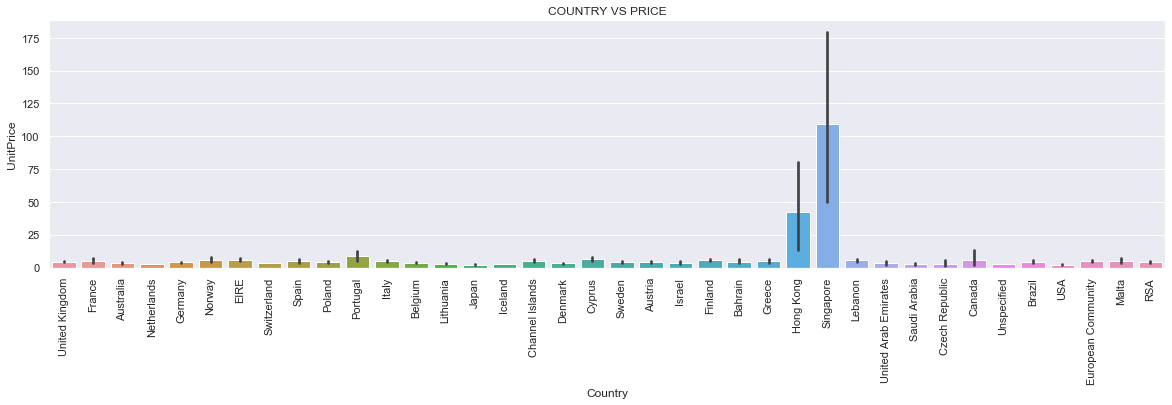

Text(0.5, 1.0, 'COUNTRY VS QUANTITY')

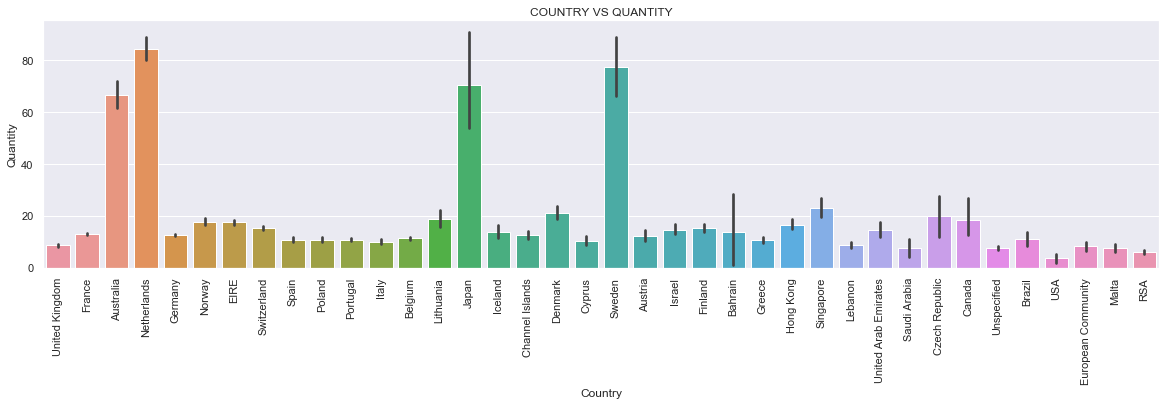

In [82]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.barplot(data = df, x="Country", y="UnitPrice")
plt.xticks(rotation=90)
plt.title("COUNTRY VS PRICE")
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(2,1,2)
sns.barplot(data = df, x="Country", y="Quantity")
plt.xticks(rotation=90)
plt.title("COUNTRY VS QUANTITY")

#ANSWER I:

Text(0.5, 1, 'PAIR PLOT FOR NUMERIC COLUMN')

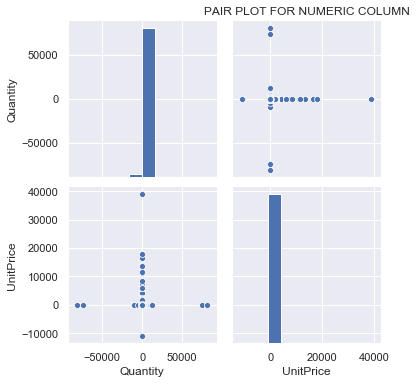

In [83]:
sns.pairplot(df, x_vars=["Quantity","UnitPrice"],y_vars=["Quantity","UnitPrice"] )
plt.title("PAIR PLOT FOR NUMERIC COLUMN", )

#ANSWER J:

In [84]:
#ANSWER L:

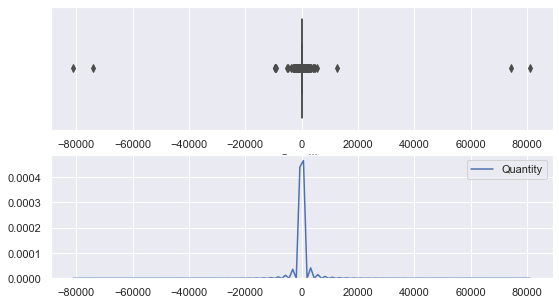

In [85]:
plt.figure(figsize = (9, 5))

plt.subplot(211)
sns.boxplot(df['Quantity'])

plt.subplot(212)
sns.kdeplot(df['Quantity'])

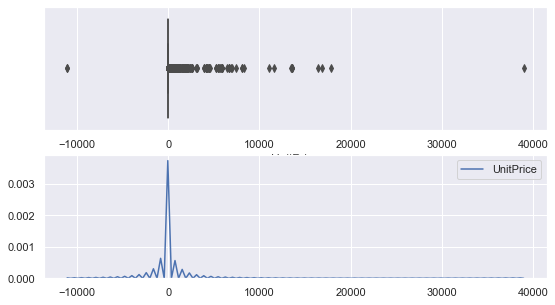

In [86]:
plt.figure(figsize = (9, 5))

plt.subplot(211)
sns.boxplot(df['UnitPrice'])

plt.subplot(212)
sns.kdeplot(df['UnitPrice'])

    QUESTION 5:

    Add the columns - Month, Day and Hour for the invoice 


In [87]:
df["InvoiceDate"] = pd.to_datetime(df['InvoiceDate'])

#Changing dtype from object to datetime

In [88]:
df["date"]= df["InvoiceDate"].apply(lambda x: str(x).split(" "))  
#OR df["date"]=pd.DatetimeIndex(df['InvoiceDate']).date

#Splitting date from InvoiceDate

In [89]:
df["year"]=pd.DatetimeIndex(df['InvoiceDate']).year
df["month"]=pd.DatetimeIndex(df['InvoiceDate']).month
df["day"]=pd.DatetimeIndex(df['InvoiceDate']).day

#Creating month,year and, day column

In [90]:
df.head()

#Checking the dataset

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,year,month,day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,"[2010-12-01, 08:26:00]",2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,"[2010-12-01, 08:26:00]",2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,"[2010-12-01, 08:26:00]",2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,"[2010-12-01, 08:26:00]",2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,"[2010-12-01, 08:26:00]",2010,12,1


# Data Analysis

    QUESTION 6:

    How many orders made by the customers? 


In [91]:
print("Total orders made in the year: ",df["InvoiceNo"].nunique())

#An invoice number identifies a particular order.
#There are 20728 orders made in one year

Total orders made in the year:  25900


    Question 7:

    TOP 5 customers with higher number of orders 


In [92]:
order_per_head = df.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
order_per_head.sort_values("InvoiceNo", ascending = False, ignore_index = True).head()

#Displaying top 5 Customer ids with highest number of orders

,CustomerID,InvoiceNo
0,14911.0,248
1,12748.0,224
2,17841.0,169
3,14606.0,128
4,13089.0,118


     QUESTION 8:

     How much money spent by the customers? 


In [93]:
df["price"]=df["Quantity"]*df["UnitPrice"]
df.head(3)

#Adding price column to the dataset to find actually cost spent

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,year,month,day,price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,"[2010-12-01, 08:26:00]",2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,"[2010-12-01, 08:26:00]",2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,"[2010-12-01, 08:26:00]",2010,12,1,22.00


In [94]:
print("Total money spend : ",df["price"].sum())

#Total money spend by the customers in the year

Total money spend :  9747747.933999998


    QUESTION 9:

    TOP 5 customers with highest money spent 


In [95]:
money_per_head = df.groupby("CustomerID")["price"].sum().reset_index()
money_per_head.sort_values("price", ascending = False, ignore_index = True).head()

#Displaying top 5 customers with highest money spent on purchasing

,CustomerID,price
0,14646.0,279489.02
1,18102.0,256438.49
2,17450.0,187482.17
3,14911.0,132572.62
4,12415.0,123725.45


     Question 10:
    
     How many orders per month? 


In [96]:
order_per_month = df.groupby("month")["InvoiceNo"].nunique().reset_index()
order_per_month

,month,InvoiceNo
0,1,1476
1,2,1393
2,3,1983
3,4,1744
4,5,2162
5,6,2012
6,7,1927
7,8,1737
8,9,2327
9,10,2637


    QUESTION 11:
    
    How many orders per day? 


In [97]:
order_per_day = df.groupby("day")["InvoiceNo"].nunique().reset_index()
order_per_day

,day,InvoiceNo
0,1,965
1,2,856
2,3,773
3,4,881
4,5,934
5,6,1150
6,7,1055
7,8,1112
8,9,903
9,10,967


    QUESTION 12:
    
    How many orders per hour?

In [98]:
df["hh"]=pd.DatetimeIndex(df['InvoiceDate']).hour
df.head(3)

#Adding hour column for analysis

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,year,month,day,price,hh
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,"[2010-12-01, 08:26:00]",2010,12,1,15.30,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,"[2010-12-01, 08:26:00]",2010,12,1,20.34,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,"[2010-12-01, 08:26:00]",2010,12,1,22.00,8


In [99]:
order_per_hour = df.groupby("hh")["InvoiceNo"].nunique().reset_index()
order_per_hour

,hh,InvoiceNo
0,6,22
1,7,31
2,8,624
3,9,1824
4,10,2961
5,11,3165
6,12,3962
7,13,3369
8,14,3137
9,15,3069


    QUESTION 13:
 
    How many orders for each country? 

    

In [100]:
order_per_country = df.groupby("Country")["InvoiceNo"].nunique().reset_index()
order_per_country

,Country,InvoiceNo
0,Australia,69
1,Austria,19
2,Bahrain,4
3,Belgium,119
4,Brazil,1
5,Canada,6
6,Channel Islands,33
7,Cyprus,20
8,Czech Republic,5
9,Denmark,21


    QUESTION 14:

    Orders trend across months

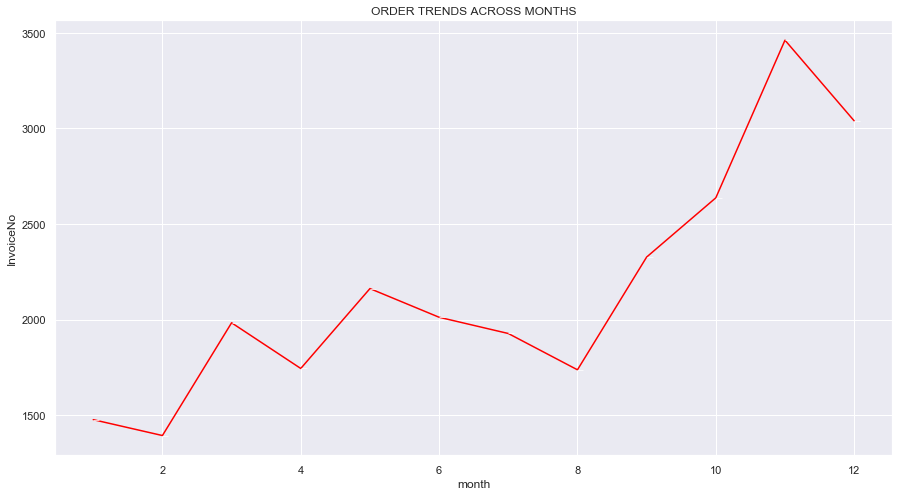

In [101]:
plt.figure(figsize=(15,8))
sns.lineplot(data=order_per_month, x="month", y="InvoiceNo", marker = True, color = "red")
plt.title("ORDER TRENDS ACROSS MONTHS");

    QUESTION 15:

    How much money spent by each country? 

In [102]:
order_per_country= df.groupby("Country")["price"].sum().reset_index()
order_per_country["price"]=order_per_country["price"].round()
order_per_country.sort_values("price", ascending = False, ignore_index = True)

#Money spent by each company

,Country,price
0,United Kingdom,8187806.0
1,Netherlands,284662.0
2,EIRE,263277.0
3,Germany,221698.0
4,France,197404.0
5,Australia,137077.0
6,Switzerland,56385.0
7,Spain,54775.0
8,Belgium,40911.0
9,Sweden,36596.0


    QUESTION 1: K

    Line chart to show the trend of data - All Numeric/Date Variables

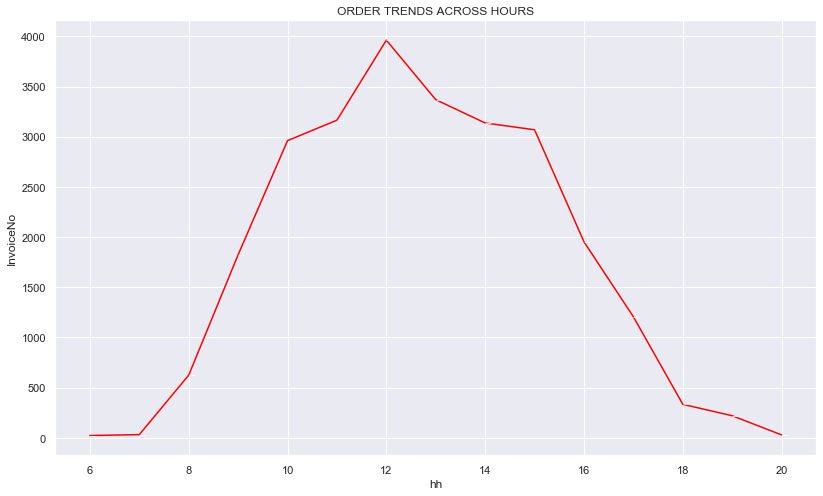

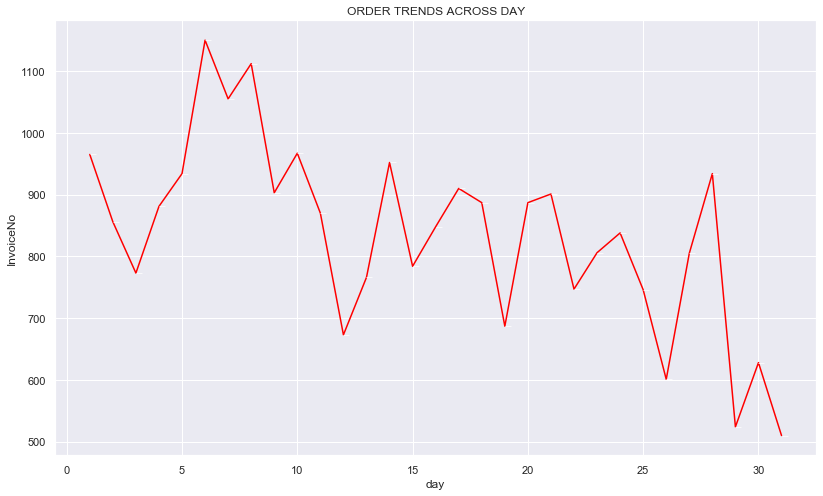

In [103]:

plt.figure(figsize=(30,8))
plt.subplot(1,2,1)
sns.lineplot(data=order_per_hour, x="hh", y="InvoiceNo", marker = True, color = "red")
plt.title("ORDER TRENDS ACROSS HOURS")


plt.figure(figsize=(30,8))
plt.subplot(1,2,2)
sns.lineplot(data=order_per_day, x="day", y="InvoiceNo", marker = True, color = "red")
plt.title("ORDER TRENDS ACROSS DAY");

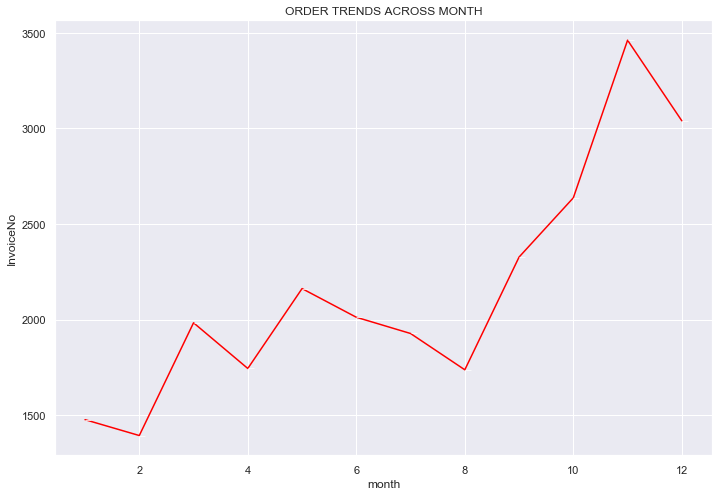

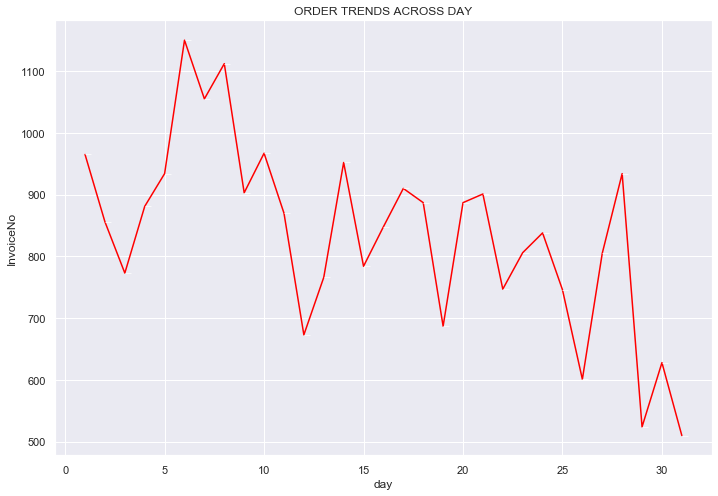

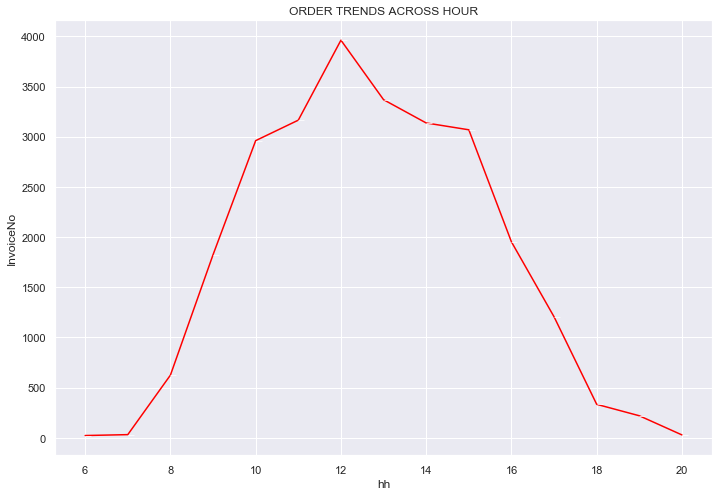

In [104]:
plt.figure(figsize=(40,8))
plt.subplot(1,3,1)
sns.lineplot(data=order_per_month, x="month", y="InvoiceNo", marker = True, color = "red")
plt.title("ORDER TRENDS ACROSS MONTH")

plt.figure(figsize=(40,8))
plt.subplot(1,3,2)
sns.lineplot(data=order_per_day, x="day", y="InvoiceNo", marker = True, color = "red")
plt.title("ORDER TRENDS ACROSS DAY")

plt.figure(figsize=(40,8))
plt.subplot(1,3,3)
sns.lineplot(data=order_per_hour, x="hh", y="InvoiceNo", marker = True, color = "red")
plt.title("ORDER TRENDS ACROSS HOUR");

In [105]:
sales_per_hour = df.groupby("hh")["price"].sum().reset_index()
sales_per_day = df.groupby("day")["price"].sum().reset_index()
sales_per_month = df.groupby("month")["price"].sum().reset_index()

#Creating Dataframes

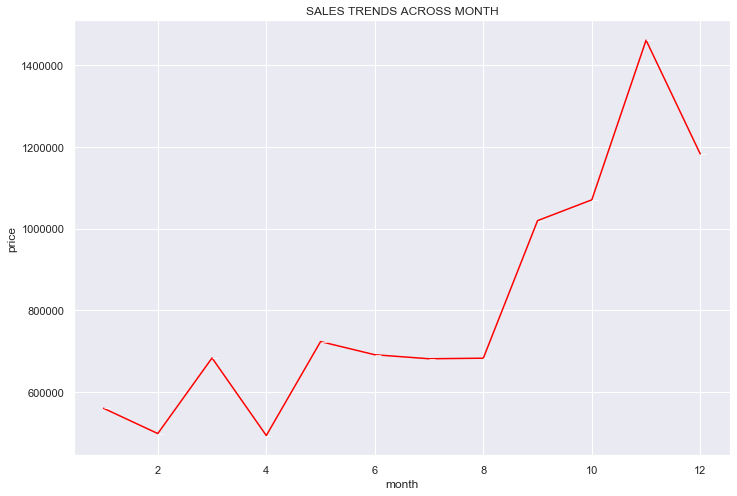

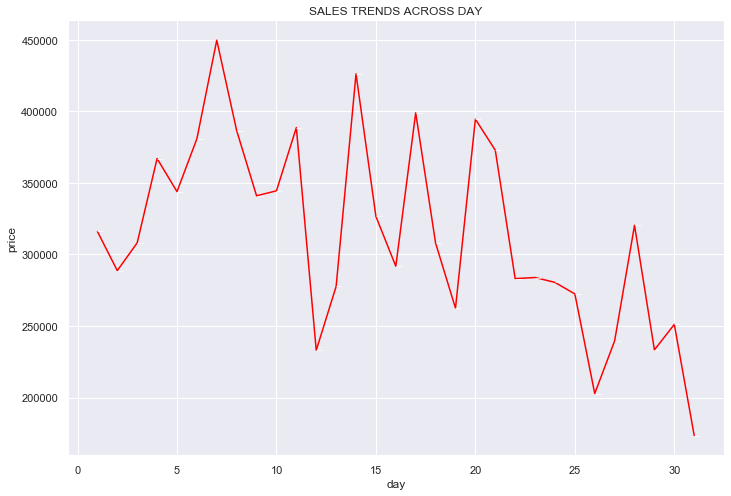

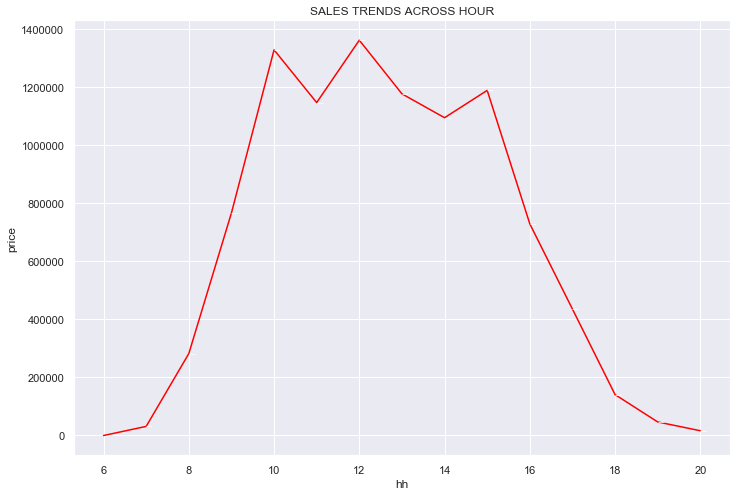

In [106]:
plt.figure(figsize=(40,8))
plt.subplot(1,3,1)
sns.lineplot(data=sales_per_month, x="month", y="price", marker = True, color = "red")
plt.title("SALES TRENDS ACROSS MONTH")

plt.figure(figsize=(40,8))
plt.subplot(1,3,2)
sns.lineplot(data=sales_per_day, x="day", y="price", marker = True, color = "red")
plt.title("SALES TRENDS ACROSS DAY")

plt.figure(figsize=(40,8))
plt.subplot(1,3,3)
sns.lineplot(data=sales_per_hour, x="hh", y="price", marker = True, color = "red")
plt.title("SALES TRENDS ACROSS HOUR");

#ploting graphs

In [107]:
quan_per_hour = df.groupby("hh")["Quantity"].sum().reset_index()
quan_per_day = df.groupby("day")["Quantity"].sum().reset_index()
quan_per_month = df.groupby("month")["Quantity"].sum().reset_index()

#Creating Dataframes

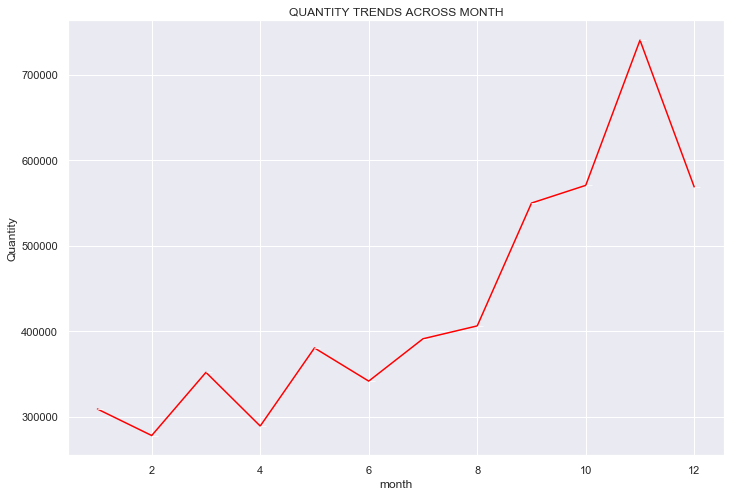

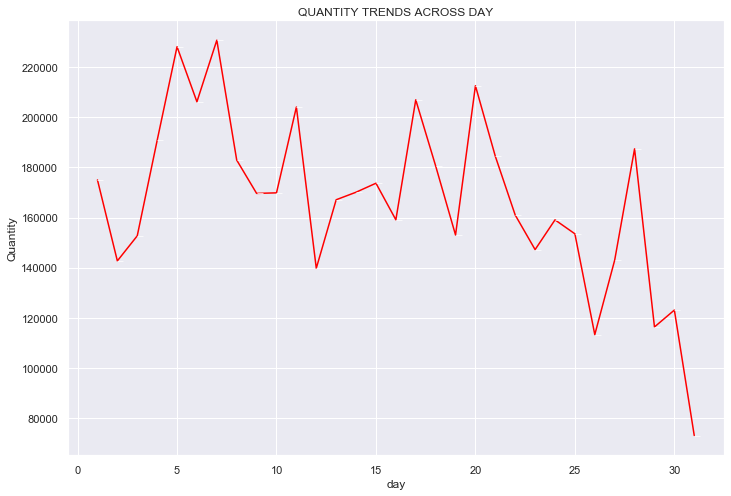

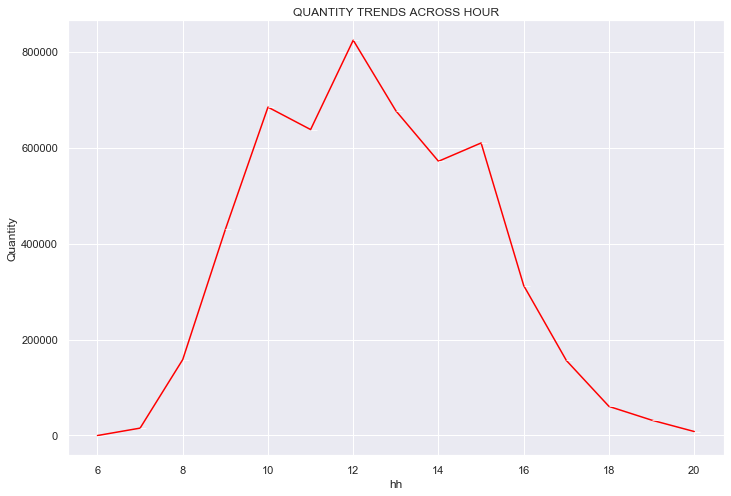

In [108]:
plt.figure(figsize=(40,8))
plt.subplot(1,3,1)
sns.lineplot(data=quan_per_month, x="month", y="Quantity", marker = True, color = "red")
plt.title("QUANTITY TRENDS ACROSS MONTH")

plt.figure(figsize=(40,8))
plt.subplot(1,3,2)
sns.lineplot(data=quan_per_day, x="day", y="Quantity", marker = True, color = "red")
plt.title("QUANTITY TRENDS ACROSS DAY")

plt.figure(figsize=(40,8))
plt.subplot(1,3,3)
sns.lineplot(data=quan_per_hour, x="hh", y="Quantity", marker = True, color = "red")
plt.title("QUANTITY TRENDS ACROSS HOUR");

#ploting graphs